# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.091385e+01     6.928902e+00
 * time: 0.005598783493041992
     1     3.059418e+01     6.034910e+00
 * time: 0.016626834869384766
     2     1.696350e+01     3.992805e+00
 * time: 0.04741191864013672
     3     1.295701e+01     2.246369e+00
 * time: 0.0728909969329834
     4     1.121996e+01     1.264902e+00
 * time: 0.09826898574829102
     5     1.047077e+01     1.000651e+00
 * time: 0.11866188049316406
     6     9.979947e+00     1.319535e+00
 * time: 0.1387488842010498
     7     9.439851e+00     7.856199e-01
 * time: 0.15921783447265625
     8     9.158575e+00     7.923990e-01
 * time: 0.18012380599975586
     9     8.998329e+00     5.296669e-01
 * time: 0.20121192932128906
    10     8.854091e+00     4.891372e-01
 * time: 0.22228288650512695
    11     8.811656e+00     1.025952e+00
 * time: 0.2380819320678711
    12     8.778310e+00     6.532971e-01
 * time: 0.2540009021759033
    13     8.718939e+00     7.734535e-01
 * time: 0

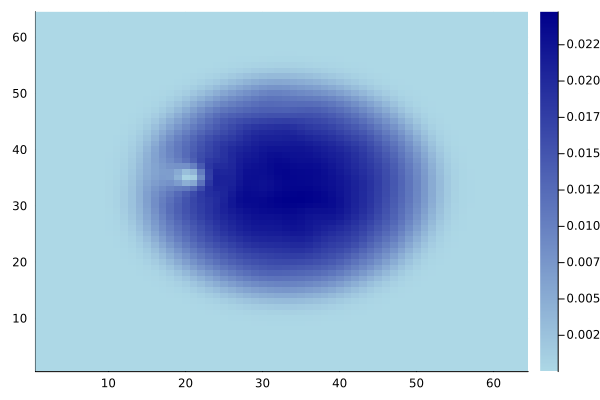

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)